In [1]:
library(ggplot2)
library(RColorBrewer)
library(scales)

In [77]:
#import analysis for DCP2 and SCAF8 sgRNAs

dcp2_scaf8_bar <- read.table('screen_validation_i/dcp2_scaf8_bar_melt.txt', sep = '\t', header = TRUE,
                             colClasses = c(rep('factor', 2), rep('numeric', 4)))

#DCP2 df
dcp2_bar <- subset(dcp2_scaf8_bar, !(dcp2_scaf8_bar$sgrna %in% c('SCAF8 sg1', 'SCAF8 sg2')))

dcp2_bar$sgrna <- factor(dcp2_bar$sgrna, levels = c('non-targeting sgRNA', 'DCP2 sg1', 'DCP2 sg2'))

head(dcp2_bar, n = 4)

#SCAF8 df
scaf8_bar <- subset(dcp2_scaf8_bar, !(dcp2_scaf8_bar$sgrna %in% c('DCP2 sg1', 'DCP2 sg2')))

scaf8_bar$sgrna <- factor(scaf8_bar$sgrna, levels = c('non-targeting sgRNA', 'SCAF8 sg1', 'SCAF8 sg2'))

head(scaf8_bar, n = 9)

,time,sgrna,rep1,rep2,mean,sd
1,Wk 0,DCP2 sg1,NA,NA,1.00,0.00
2,Wk 0,DCP2 sg2,NA,NA,1.00,0.00
5,Wk 0,non-targeting sgRNA,NA,NA,1.00,0.00
6,Wk 1,DCP2 sg1,0.52,0.43,0.47,0.06


,time,sgrna,rep1,rep2,mean,sd
3,Wk 0,SCAF8 sg1,NA,NA,1.00,0.00
4,Wk 0,SCAF8 sg2,NA,NA,1.00,0.00
5,Wk 0,non-targeting sgRNA,NA,NA,1.00,0.00
8,Wk 1,SCAF8 sg1,0.20,0.20,0.20,0.00
9,Wk 1,SCAF8 sg2,0.16,0.39,0.28,0.17
10,Wk 1,non-targeting sgRNA,1.14,1.00,1.07,0.11
13,Wk 2,SCAF8 sg1,0.00,0.13,0.06,0.09
14,Wk 2,SCAF8 sg2,0.06,0.00,0.03,0.05
15,Wk 2,non-targeting sgRNA,1.16,1.08,1.12,0.06


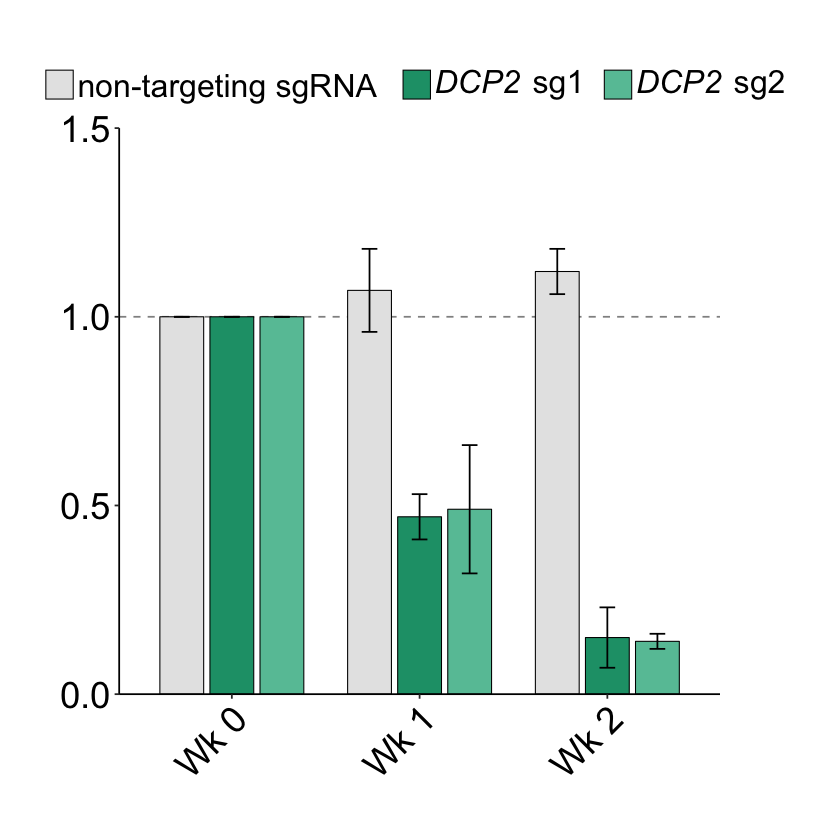

In [80]:
p <- ggplot(dcp2_bar, aes(x = time)) +
geom_hline(yintercept = 1, linetype = 'dashed', alpha = 0.5) +
geom_bar(aes(fill = sgrna, y = mean), 
         stat = 'identity', position = position_dodge(0.8), width = 0.7, color = 'black', size = 0.3) +
theme_classic() +
theme(axis.text.x = element_text(size = rel(2.5), color = 'black', angle = 45, hjust = 1),
      axis.text.y = element_text(size = rel(2.5), color = 'black'),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.75), color = 'black'),
      legend.position = 'top',
      legend.text.align = 0,
      plot.margin = margin(0.5, 1, 0.5, 0.5, 'inches')
      ) +
labs(x = 'Weeks after treatment', y = 'Relative fraction of\nsgRNA+ cells') +
scale_y_continuous(expand = c(0,0), limits = c(0,1.5)) +
geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, group = sgrna, width = 0.25), 
              position = position_dodge(0.8)) +
scale_color_manual(labels = c('non-targeting sgRNA  ', 
                              expression(italic('DCP2') * ' sg1  '),
                              expression(italic('DCP2') * ' sg2  ')), 
                   values = c('gray90', brewer.pal(3, 'Dark2')[1], brewer.pal(3, 'Set2')[1])) +
scale_fill_manual(labels = c('non-targeting sgRNA  ', 
                              expression(italic('DCP2') * ' sg1  '),
                              expression(italic('DCP2') * ' sg2  ')), 
                  values = c('gray90', brewer.pal(3, 'Dark2')[1], brewer.pal(3, 'Set2')[1]))

ggsave('dcp2_bar_outline.pdf', width = 7, height = 5.5)

#12 x 5.5 for right legend

p

Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

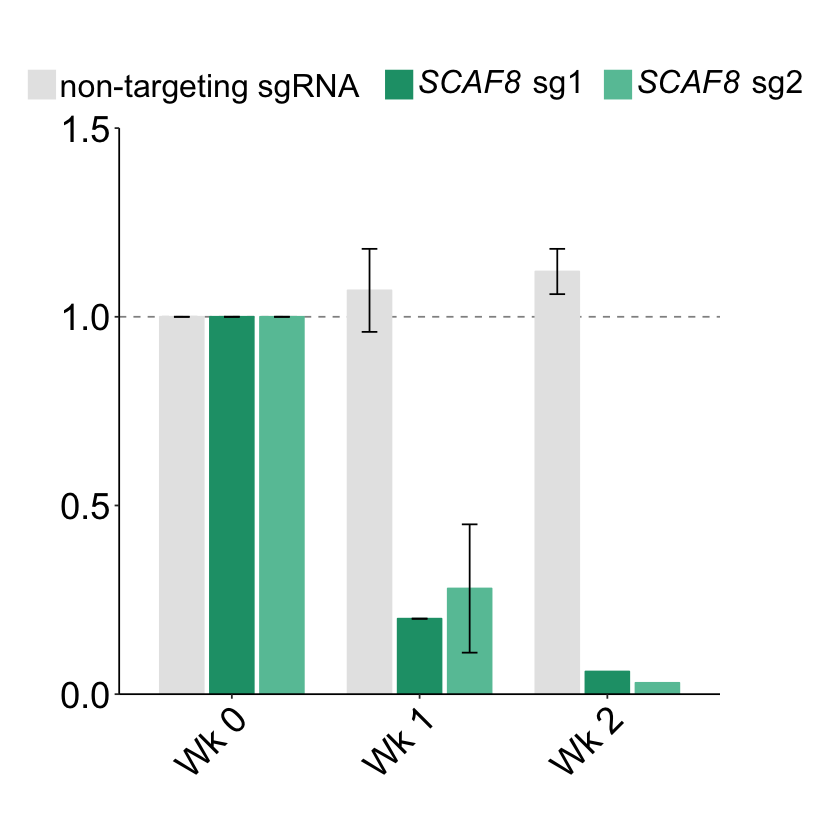

In [79]:
p <- ggplot(scaf8_bar, aes(x = time)) +
geom_hline(yintercept = 1, linetype = 'dashed', alpha = 0.5) +
geom_bar(aes(fill = sgrna, y = mean, color = sgrna), 
         stat = 'identity', position = position_dodge(0.8), width = 0.7) +
theme_classic() +
theme(axis.text.x = element_text(size = rel(2.5), color = 'black', angle = 45, hjust = 1),
      axis.text.y = element_text(size = rel(2.5), color = 'black'),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.75), color = 'black'),
      legend.position = 'top',
      legend.text.align = 0,
      plot.margin = margin(0.5, 1, 0.5, 0.5, 'inches')
      ) +
labs(x = 'Weeks after treatment', y = 'Relative fraction of\nsgRNA+ cells') +
scale_y_continuous(expand = c(0,0), limits = c(0,1.5)) +
geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, group = sgrna, width = 0.25), 
              position = position_dodge(0.8)) +
scale_color_manual(labels = c('non-targeting sgRNA  ', 
                              expression(italic('SCAF8') * ' sg1  '),
                              expression(italic('SCAF8') * ' sg2  ')), 
                   values = c('gray90', brewer.pal(3, 'Dark2')[1], brewer.pal(3, 'Set2')[1])) +
scale_fill_manual(labels = c('non-targeting sgRNA  ', 
                              expression(italic('SCAF8') * ' sg1  '),
                              expression(italic('SCAF8') * ' sg2  ')), 
                  values = c('gray90', brewer.pal(3, 'Dark2')[1], brewer.pal(3, 'Set2')[1]))

ggsave('scaf8_bar.pdf', width = 7, height = 5.5)

#12 x 5.5 for right legend

p

In [21]:
#DCP2 and SCAF8 depletion with day 2

dcp2_scaf8 <- read.table('screen_validation_i/dcp2_scaf8_line_melt.txt', sep = '\t', header = TRUE,
                         colClasses = c('integer', 'factor', 'numeric', 'numeric'))

dcp2_scaf8$sgrna <- factor(dcp2_scaf8$sgrna, levels = c('non-targeting sgRNA', 'DCP2 sg1', 'DCP2 sg2', 'SCAF8 sg1', 
                           'SCAF8 sg2'))

head(dcp2_scaf8, n = 10)

day,sgrna,mean,sd
0,DCP2 sg1,1.00,0.00
0,DCP2 sg2,1.00,0.00
0,SCAF8 sg1,1.00,0.00
0,SCAF8 sg2,1.00,0.00
0,non-targeting sgRNA,1.00,0.00
2,DCP2 sg1,0.87,0.01
2,DCP2 sg2,1.02,0.03
2,SCAF8 sg1,0.88,0.06
2,SCAF8 sg2,0.88,0.05
2,non-targeting sgRNA,1.13,0.07


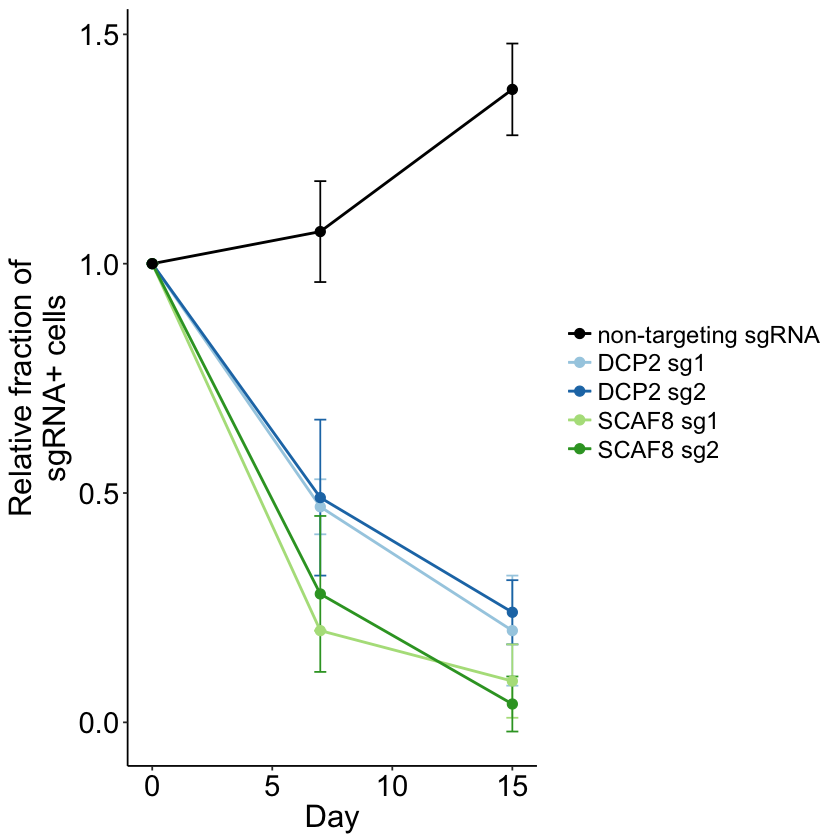

In [152]:
p <- ggplot(dcp2_scaf8[c(1:5, 11:20),], aes(x = day, y = mean, color = sgrna)) +
geom_line(size = 0.8) +
theme_classic() +
theme(axis.text.x = element_text(size = rel(2), color = 'black', angle = 0),
      axis.text.y = element_text(size = rel(2), color = 'black'),
      axis.title.x = element_text(size = rel(1.7)),
      axis.title.y = element_text(size = rel(1.7)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.3), color = 'black'),
      legend.position = 'right'
      ) +
labs(x = 'Day', y = 'Relative fraction of\nsgRNA+ cells') +
scale_x_continuous(breaks = seq(0,15,5)) +
scale_color_manual(values = c('black', brewer.pal(4, 'Paired'))) +
geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, color = sgrna), width = 0.5) +
geom_point(size = 2.5)

ggsave('dcp2_scaf8_line.pdf', width = 8, height = 4)

p

In [59]:
dcp2_scaf8_bar <- read.table('screen_validation_i/dcp2_scaf8_bar_melt.txt', sep = '\t', header = TRUE,
                             colClasses = c('factor', 'factor', 'numeric', 'numeric'))

dcp2_scaf8_bar$sgrna <- factor(dcp2_scaf8_bar$sgrna, levels = c('non-targeting sgRNA', 'DCP2 sg1', 'DCP2 sg2', 'SCAF8 sg1', 
                           'SCAF8 sg2'))

head(dcp2_scaf8_bar, n = 10)

time,sgrna,mean,sd
Wk 0,DCP2 sg1,1.00,0.00
Wk 0,DCP2 sg2,1.00,0.00
Wk 0,SCAF8 sg1,1.00,0.00
Wk 0,SCAF8 sg2,1.00,0.00
Wk 0,non-targeting sgRNA,1.00,0.00
Wk 1,DCP2 sg1,0.47,0.06
Wk 1,DCP2 sg2,0.49,0.17
Wk 1,SCAF8 sg1,0.20,0.00
Wk 1,SCAF8 sg2,0.28,0.17
Wk 1,non-targeting sgRNA,1.07,0.11


Warning message in brewer.pal(2, "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”Warning message in brewer.pal(2, "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

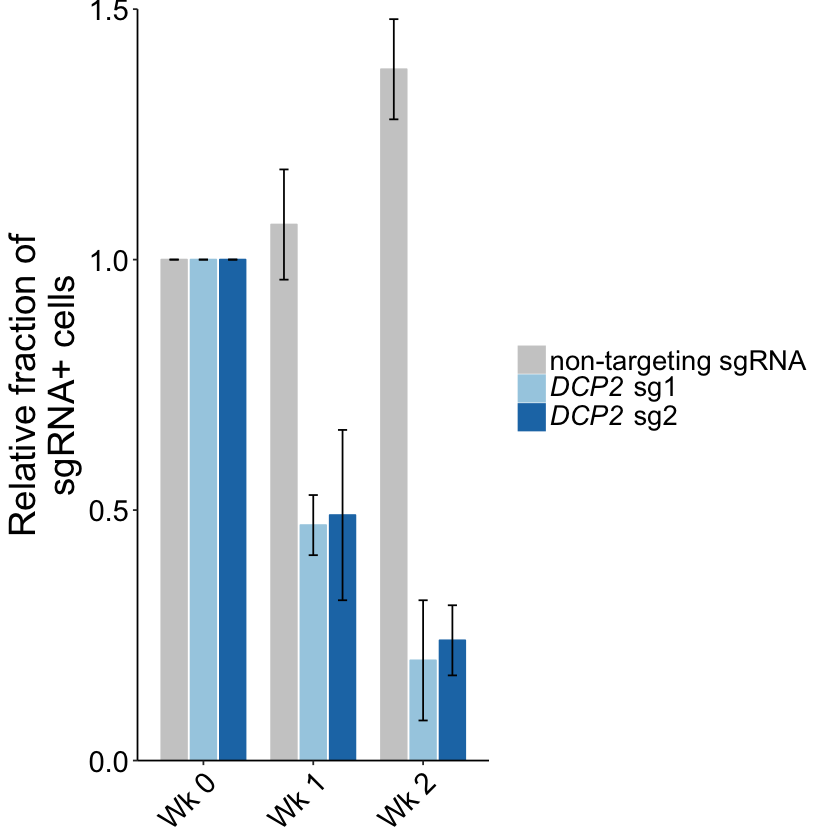

In [108]:
scaf8_bar <- subset(dcp2_scaf8_bar, !(dcp2_scaf8_bar$sgrna %in% c('DCP2 sg1', 'DCP2 sg2')))

head(scaf8_bar, n = 8)

,time,sgrna,mean,sd
3,Wk 0,SCAF8 sg1,1.00,0.00
4,Wk 0,SCAF8 sg2,1.00,0.00
5,Wk 0,non-targeting sgRNA,1.00,0.00
8,Wk 1,SCAF8 sg1,0.20,0.00
9,Wk 1,SCAF8 sg2,0.28,0.17
10,Wk 1,non-targeting sgRNA,1.07,0.11
13,Wk 2,SCAF8 sg1,0.09,0.08
14,Wk 2,SCAF8 sg2,0.04,0.06


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

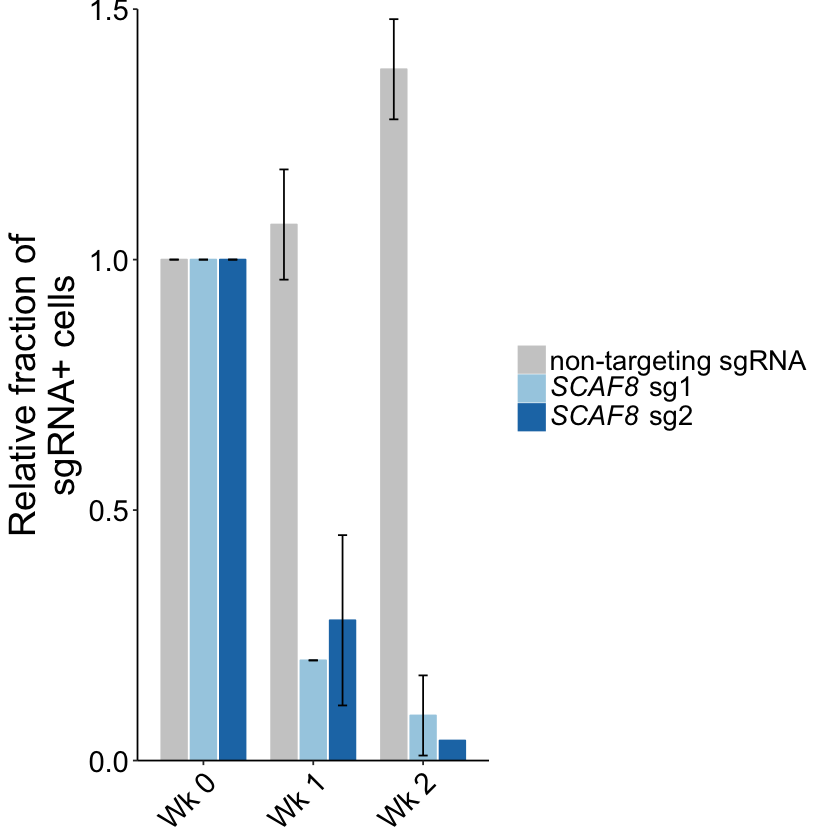

In [118]:
p <- ggplot(scaf8_bar, aes(x = time, y = mean)) +
geom_bar(aes(color = sgrna, fill = sgrna), 
         stat = 'identity', position = position_dodge(0.8), width = 0.7) +
theme_classic() +
theme(axis.text.x = element_text(size = rel(2), color = 'black', angle = 45, hjust = 1),
      axis.text.y = element_text(size = rel(2), color = 'black'),
      axis.title.x = element_blank(),
      axis.title.y = element_text(size = rel(2)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.5), color = 'black'),
      legend.position = 'right',
      legend.text.align = 0
      ) +
labs(x = 'Weeks after treatment', y = 'Relative fraction of\nsgRNA+ cells') +
scale_y_continuous(expand = c(0,0), limits = c(0,1.5)) +
geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, group = sgrna, width = 0.25), 
              position = position_dodge(0.8)) +
scale_color_manual(labels = c('non-targeting sgRNA', 
                              expression(italic('SCAF8') * ' sg1'),
                              expression(italic('SCAF8') * ' sg2')), 
                   values = c('gray80', brewer.pal(8, 'Paired')[1:2])) +
scale_fill_manual(labels = c('non-targeting sgRNA', 
                              expression(italic('SCAF8') * ' sg1'),
                              expression(italic('SCAF8') * ' sg2')), 
                  values = c('gray80', brewer.pal(8, 'Paired')[1:2]))

ggsave('scaf8_bar.pdf', width = 8, height = 4)

p

In [120]:
dcp2_scaf8

day,sgrna,mean,sd
0,DCP2 sg1,1.00,0.00
0,DCP2 sg2,1.00,0.00
0,SCAF8 sg1,1.00,0.00
0,SCAF8 sg2,1.00,0.00
0,non-targeting sgRNA,1.00,0.00
2,DCP2 sg1,0.87,0.01
2,DCP2 sg2,1.02,0.03
2,SCAF8 sg1,0.88,0.06
2,SCAF8 sg2,0.88,0.05
2,non-targeting sgRNA,1.13,0.07


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

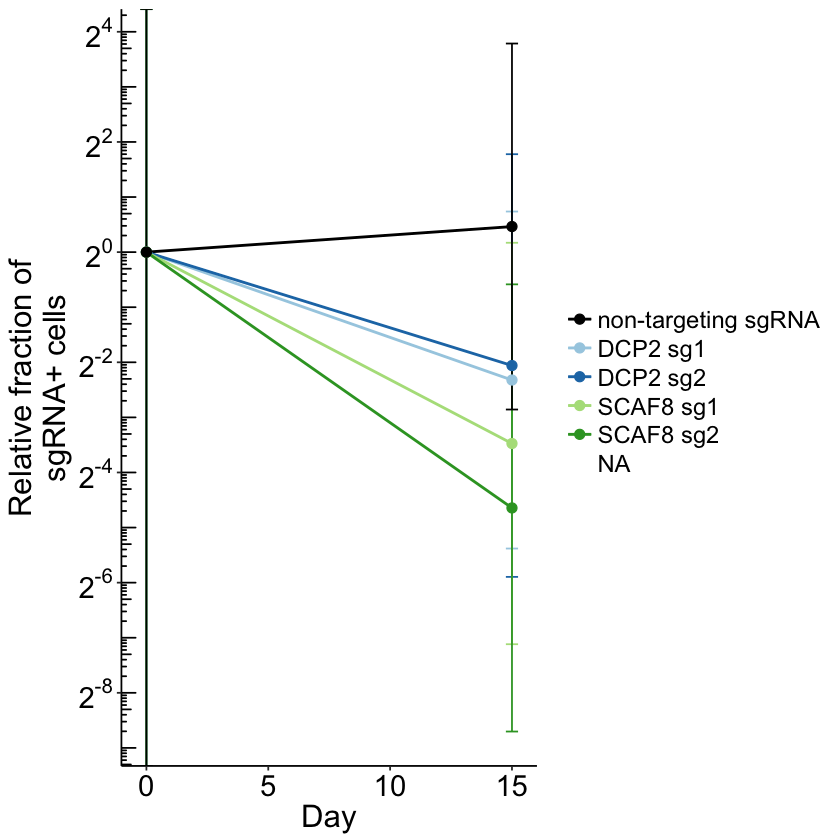

In [163]:
p <- ggplot(dcp2_scaf8[c(1:5, 11:20),], aes(x = day, y = mean, color = sgrna)) +
geom_line(size = 0.8) +
theme_classic() +
theme(axis.text.x = element_text(size = rel(2), color = 'black', angle = 0),
      axis.text.y = element_text(size = rel(2), color = 'black'),
      axis.title.x = element_text(size = rel(1.7)),
      axis.title.y = element_text(size = rel(1.7)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.3), color = 'black'),
      legend.position = 'right'
      ) +
labs(x = 'Day', y = 'Relative fraction of\nsgRNA+ cells') +
scale_x_continuous(breaks = seq(0,15,5)) +
scale_color_manual(values = c('black', brewer.pal(4, 'Paired'))) +
geom_errorbar(aes(ymin = mean / sd, ymax = mean * sd, color = sgrna), width = 0.5) +
geom_point(size = 2.5) +
scale_y_continuous(trans = log2_trans(),
    breaks = trans_breaks("log2", function(x) 2^x),
    labels = trans_format("log2", math_format(2^.x))) +
        
annotation_logticks(sides = 'l')

ggsave('dcp2_scaf8_log.pdf', width = 8, height = 4)

p

In [157]:
#DCP2 and SCAF8 depletion with log transform

dcp2_scaf8 <- read.table('screen_validation_i/dcp2_scaf8_line_melt.txt', sep = '\t', header = TRUE#,
                         #colClasses = c('integer', 'factor', 'numeric', 'numeric'))
)
dcp2_scaf8$sgrna <- factor(dcp2_scaf8$sgrna, levels = c('non-targeting sgRNA', 'DCP2 sg1', 'DCP2 sg2', 'SCAF8 sg1', 
                           'SCAF8 sg2'))

head(dcp2_scaf8, n = 10)

day,sgrna,rep1,rep2,mean,sd,log_rep1,log_rep2,log_mean,log_sd
0,DCP2 sg1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
0,DCP2 sg2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
0,SCAF8 sg1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
0,SCAF8 sg2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
0,non-targeting sgRNA,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
7,DCP2 sg1,0.52,0.43,0.47,0.06,-0.29,-0.36,-0.32,0.05
7,DCP2 sg2,0.37,0.61,0.49,0.17,-0.43,-0.22,-0.32,0.15
7,SCAF8 sg1,0.20,0.20,0.20,0.00,-0.70,-0.70,-0.70,0.00
7,SCAF8 sg2,0.16,0.39,0.28,0.17,-0.80,-0.41,-0.60,0.28
7,non-targeting sgRNA,1.14,1.00,1.07,0.11,0.06,0.00,0.03,0.04


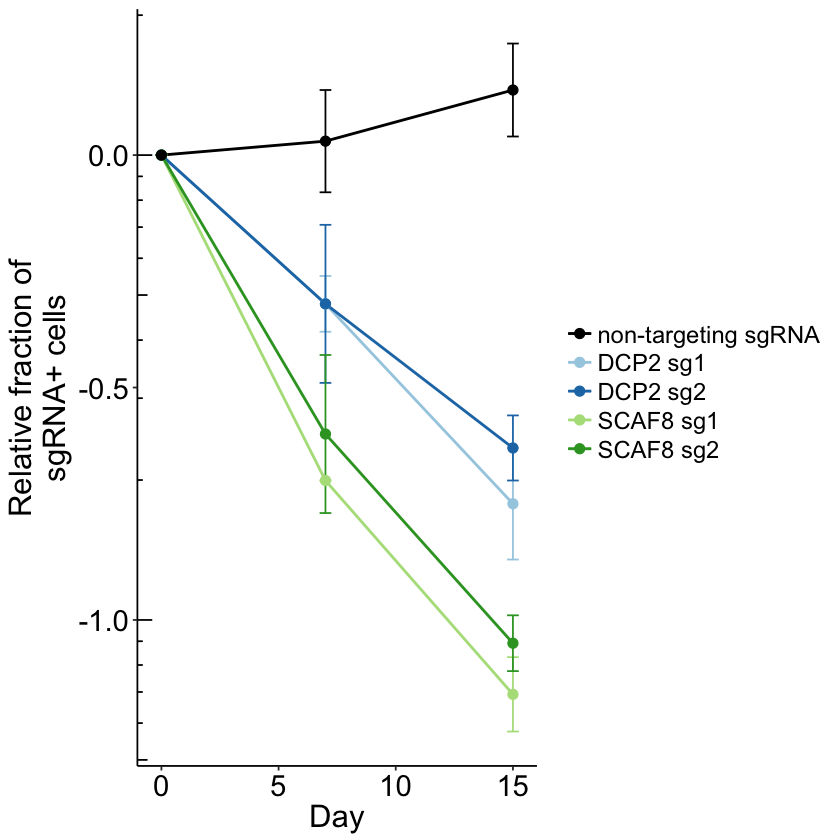

In [159]:
p <- ggplot(dcp2_scaf8, aes(x = day, y = log_mean, color = sgrna)) +
geom_line(size = 0.8) +
theme_classic() +
theme(axis.text.x = element_text(size = rel(2), color = 'black', angle = 0),
      axis.text.y = element_text(size = rel(2), color = 'black'),
      axis.title.x = element_text(size = rel(1.7)),
      axis.title.y = element_text(size = rel(1.7)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.3), color = 'black'),
      legend.position = 'right'
      ) +
labs(x = 'Day', y = 'Relative fraction of\nsgRNA+ cells') +
scale_x_continuous(breaks = seq(0,15,5)) +
scale_color_manual(values = c('black', brewer.pal(4, 'Paired'))) +
geom_errorbar(aes(ymin = log_mean - sd, ymax = log_mean + sd, color = sgrna), width = 0.5) +
geom_point(size = 2.5) +
        
annotation_logticks(sides = 'l')

p